1.	Read and explore the given dataset.  

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Ignoring warning
import warnings;warnings.simplefilter('ignore')

In [4]:
# reading the csv data on a Dataframe
amazon = pd.read_csv('ratings_Electronics.csv')
amazon.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
# Adding col names to the dataframe
amazon.columns = ['userid','itemid','rating','Tstamp']

In [6]:
# making a copy of the dataframe to work with
amazon.head()
df = amazon.copy()

In [7]:
# Droping the timestamp data as it is not required for recommendation
df = df.drop(labels=['Tstamp'],axis=1)

In [8]:
df.head()

,userid,itemid,rating
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0
3,A1GI0U4ZRJA8WN,0439886341,1.0
4,A1QGNMC6O1VW39,0511189877,5.0


In [9]:
# Knowing the size of the dataframe i.e no of records and columns
df.shape


(7824481, 3)

In [10]:
# Getting the datatype for the columns 
# The datatype is in required format 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userid    object
itemid    object
rating    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [11]:
# Finding if nay null value is present or not
# There are no null value in the dataframe
df.isna().sum()

userid    0
itemid    0
rating    0
dtype: int64

In [12]:
# Knowing the statistical distribution of the ratings given by users to diff items
# Max rating given is 5
# Min rating given is 1
# Mean is less than median so the distributin=on is left skewed i.e more items are given max ratings 
df[['rating']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [13]:
# Getting the distribution of items rating vise
df[['itemid','rating']].groupby('rating').count()

,itemid
rating,
1.0,901765
2.0,456322
3.0,633073
4.0,1485781
5.0,4347540


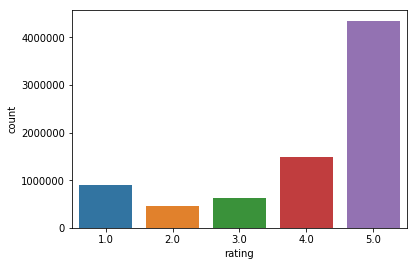

In [14]:
# Plotting the distribution on the bar plot
sns.countplot(df['rating'])

In [15]:
# Getting the unique no of users and the items
print('unique user :',df['userid'].nunique())
print('unique items :',df['itemid'].nunique())

unique user : 4201696
unique items : 476001


2.	Take a subset of the dataset to make it less sparse/ denser. 

In [16]:
# Getting the count of items for which each user has given ratings 
cnt = df.groupby('userid').size().sort_values(ascending=False)

In [17]:
cnt[:10]

userid
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [18]:
# making a dataframe for the users rateted more than 50 
df2 = df[df['userid'].isin(cnt[cnt>=50].index)]

In [19]:
df2.head()

,userid,itemid,rating
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [20]:
# Shape of the reduced dataframe
df2.shape

(125871, 3)

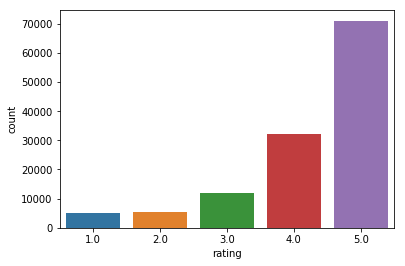

In [21]:
# distribution ofthe data w.r.t the rating
sns.countplot(df2['rating'])

In [22]:
# Unique users and items in new dataframe
print('unique user :',df2['userid'].nunique())
print('unique items :',df2['itemid'].nunique())

unique user : 1540
unique items : 48190


In [23]:
# converting the dataframe in a matrix form with ratings as the value 
mat = df2.pivot(index='userid',columns='itemid',values='rating')

In [24]:
# fillling all the user item point with the 0 value for which users has not given any rating
mat = mat.fillna(0)
mat.head()

itemid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userid,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# total no of no zero rating in the matrix and the sahpe of the mat
no_of_rate = np.count_nonzero(mat)
mat.shape

(1540, 48190)

In [26]:
# the records for which items are rated
no_of_rate

125871

In [27]:
#total no of rating position available
no_of_tot_rate = mat.shape[0] * mat.shape[1]
no_of_tot_rate

74212600

In [28]:
# finding the density of the rating 
dens = no_of_rate / no_of_tot_rate
density = dens * 100
density

0.1696086648358904

In [29]:
# transposing the matrix so that the items are in row and users are in col
# This is required for item based recommendation
mat1 = mat.T

In [30]:
mat1.head()

userid,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
itemid,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3.	Split the data randomly into train and test dataset

In [31]:
# Slitting the data in train and test set
from sklearn.model_selection import train_test_split
train,test = train_test_split(df2,test_size=.30,random_state=1)

4. Building popularity based recommendation system

In [32]:
train.head(5)

,userid,itemid,rating
4045823,AW63IRQWH10GF,B004DUMUA6,3.0
5461879,A2D1ZQEFS1NBH2,B006QDYH9U,1.0
1929769,AZNUHQSHZHSUE,B001DFZ5J2,4.0
685543,A3VTOLNB5N6FVP,B0009U7XH4,5.0
3461618,A17Z0LVY96TO53,B003MVZ60I,4.0


In [33]:
train_data_grouped = train.groupby('itemid').agg({'userid': 'count'}).reset_index()

In [34]:
train_data_grouped.rename(columns = {'userid': 'score'},inplace=True)

In [35]:
train_data_sort = train_data_grouped.sort_values(['score', 'itemid'], ascending = [0,1])

In [36]:
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')

In [37]:
popularity_recommendations = train_data_sort.head(5)

In [38]:
popularity_recommendations

,itemid,score,Rank
30797,B0088CJT4U,155,1.0
19529,B003ES5ZUU,124,2.0
8601,B000N99BBC,122,3.0
30194,B007WTAJTO,112,4.0
30489,B00829TIEK,100,5.0


In [39]:
    
    def recommend(user_id):    
        user_recommendations = popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['userId'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [40]:
users = [15,25,30]
for i in users:
    print('The recommendations for user :%d' %(i))
    print(recommend(i))
    print('\n')

The recommendations for user :15
       userId      itemid  score  Rank
30797      15  B0088CJT4U    155   1.0
19529      15  B003ES5ZUU    124   2.0
8601       15  B000N99BBC    122   3.0
30194      15  B007WTAJTO    112   4.0
30489      15  B00829TIEK    100   5.0


The recommendations for user :25
       userId      itemid  score  Rank
30797      25  B0088CJT4U    155   1.0
19529      25  B003ES5ZUU    124   2.0
8601       25  B000N99BBC    122   3.0
30194      25  B007WTAJTO    112   4.0
30489      25  B00829TIEK    100   5.0


The recommendations for user :30
       userId      itemid  score  Rank
30797      30  B0088CJT4U    155   1.0
19529      30  B003ES5ZUU    124   2.0
8601       30  B000N99BBC    122   3.0
30194      30  B007WTAJTO    112   4.0
30489      30  B00829TIEK    100   5.0




As it is a popularity based recommendation model all users are getting same recommendations

5.	Build Collaborative Filtering model.

In [41]:
# We already have mat1 in required format
mat1.head(),mat1.shape

(userid      A100UD67AHFODS  A100WO06OQR8BQ  A105S56ODHGJEK  A105TOJ6LTVMBG  \
 itemid                                                                       
 0594451647             0.0             0.0             0.0             0.0   
 0594481813             0.0             0.0             0.0             0.0   
 0970407998             0.0             0.0             0.0             0.0   
 0972683275             0.0             0.0             0.0             0.0   
 1400501466             0.0             0.0             0.0             0.0   
 
 userid      A10AFVU66A79Y1  A10H24TDLK2VDP  A10NMELR4KX0J6  A10O7THJ2O20AG  \
 itemid                                                                       
 0594451647             0.0             0.0             0.0             0.0   
 0594481813             0.0             0.0             0.0             0.0   
 0970407998             0.0             0.0             0.0             0.0   
 0972683275             0.0             0.0       

In [42]:
# User-User similarity
mat_user_CF = mat1.T

mat_user_CF['userId']=np.arange(0,len(mat_user_CF),1)
mat_user_CF.set_index(['userId'],inplace=True)

mat_user_CF.head()

itemid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Since the data set does not have ratings available for all items from users 
# The dataset is highly sparsed
# To deal with sparse dataset the best way is SVD or Matrix Factorization approach

In [229]:
# Using scipy library for matrix decomposition
from scipy.sparse.linalg import svds
U,sigma,Vt = svds(mat_user_CF,k=50)
#Converting the sigma into diagonal matrix
sigma = np.diag(sigma)

In [303]:
user_pred_rating = np.dot(np.dot(U,sigma),Vt)
pred_df = pd.DataFrame(user_pred_rating,columns=mat_user_CF.columns)
pred_df.head()
# all ratings with 0 values are replaced with possible ratings

itemid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.005086,0.002178,0.003668,-0.040843,0.009640,0.006808,0.020659,0.000649,0.020331,0.005633,...,0.000238,-0.061477,0.001214,-0.123433,0.028490,0.016109,0.002855,-0.174568,0.011367,-0.012997
1,0.002286,-0.010898,-0.000724,0.130259,0.007506,-0.003350,0.063711,-0.000674,0.016111,-0.002433,...,-0.000038,0.013766,0.001473,0.025588,-0.042103,0.004251,0.002177,-0.024362,-0.014765,0.038570
2,-0.001655,-0.002675,-0.007355,0.007264,0.005152,-0.003986,-0.003480,0.006961,-0.006606,-0.002719,...,-0.001708,-0.051040,0.000325,-0.054867,0.017870,-0.004996,-0.002426,0.083928,-0.112205,0.005964
3,0.001856,0.011019,-0.005910,-0.014134,0.000179,0.001877,-0.005391,-0.001709,0.004968,0.001402,...,0.000582,-0.009326,-0.000465,-0.048315,0.023302,0.006790,0.003380,0.005460,-0.015263,-0.025996
4,0.001115,-0.002670,0.011018,0.014434,0.010319,0.006002,0.017151,0.003726,0.001404,0.005645,...,0.000207,0.023761,0.000747,-0.019347,-0.012749,0.001026,0.001364,-0.020580,0.011828,0.012770


In [307]:
# Recommend the items with highest predicted rating
def recommend_item(UID,mat_user_CF,pred_df,num_recommendation):
    user_idx = UID-1 # user start at 1 and not 0
    sorted_user_rating = mat_user_CF.iloc[user_idx].sort_values(ascending=False)
    sorted_user_pred = pred_df.iloc[user_idx].sort_values(ascending=False)
    temp = pd.concat([sorted_user_rating,sorted_user_pred],axis=1)
    temp.index.name = 'Recommended item'
    temp.columns = ['user_rating','user_pred']
    temp = temp.loc[temp.user_rating==0]
    temp = temp.sort_values('user_pred',ascending=False)
    print('The recommended items for user:{}'.format(UID))
    print(temp.head(num_recommendation))
    

7.	Get top - K ( K = 5) recommendations

In [308]:
# recommendation for the users
UID = [10,20,121]
num_recommendation = 5
for i in UID:
    recommend_item(i,mat_user_CF,pred_df,num_recommendation)

The recommended items for user:10
                  user_rating  user_pred
Recommended item                        
B007WTAJTO                0.0   1.330201
B001TH7GUU                0.0   1.216939
B0019EHU8G                0.0   0.934725
B000VX6XL6                0.0   0.842173
B000QUUFRW                0.0   0.732741
The recommended items for user:20
                  user_rating  user_pred
Recommended item                        
B004CLYEDC                0.0   1.228042
B000N99BBC                0.0   1.110763
B008DWCRQW                0.0   1.106711
B0088CJT4U                0.0   1.105205
B002SQK2F2                0.0   0.747075
The recommended items for user:121
                  user_rating  user_pred
Recommended item                        
B000LRMS66                0.0   0.543927
B002WE4HE2                0.0   0.423175
B000KO0GY6                0.0   0.416801
B001XURP7W                0.0   0.356788
B005HMKKH4                0.0   0.352138


6. Model Evaluation

In [47]:
mat_user_CF.head()

itemid,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
mat_user_CF.mean().head()

itemid
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [49]:
pred_df.mean().head()

itemid
0594451647    0.001953
0594481813    0.002875
0970407998    0.003355
0972683275    0.010343
1400501466    0.004871
dtype: float64

In [50]:
rmse_df = pd.concat([mat_user_CF.mean(),pred_df.mean()],axis=1)
rmse_df.columns = ['Avg_rating','Avg_pred']
rmse_df.shape
rmse_df['item_idx'] = np.arange(0,len(rmse_df),1)
rmse_df.head()

,Avg_rating,Avg_pred,item_idx
itemid,,,
0594451647,0.003247,0.001953,0
0594481813,0.001948,0.002875,1
0970407998,0.003247,0.003355,2
0972683275,0.012338,0.010343,3
1400501466,0.012987,0.004871,4


6.	Evaluate both the models. Based on RMSE

In [51]:
RMSE = round((((rmse_df.Avg_rating - rmse_df.Avg_pred)**2).mean()**.5),5)
print('RMSE of SVD model is:{}'.format(RMSE))

RMSE of SVD model is:0.00275


# CF model using surprise package

In [254]:
# We will use surprise library for CF and will use KNNWithMeans
# we take 10000 records as for memory issue
from surprise import Reader, Dataset,SVD,accuracy,Prediction,KNNWithMeans
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df2.head(10000)[['userid', 'itemid', 'rating']], reader)

In [255]:
# spliting the data in train test
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.30,random_state=1)

In [256]:
# creating user records
user_records = trainset.ur

In [257]:
#value for user 0 with inner ids of items for which the user has given ratings
user_records[0]

[(0, 5.0), (622, 5.0), (1039, 5.0), (467, 5.0), (258, 5.0)]

In [258]:
print(trainset.to_raw_iid(100))

B00009R89L


In [430]:
knn = KNNWithMeans(51,sim_options={'name':'pearson','user_based':False})
knn.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [431]:
# Finding the prediction
pred = knn.test(testset)

In [432]:
# The accuracy of the model in terms of rmse
accuracy.rmse(pred)

RMSE: 1.2072


1.2072439306080927

In [433]:
# prediction for user 110 where 110 is the inner id
# was impossible equals false means that there are no enough inforamtion available with respect to the user and the ratings 
# This is beacuse of sparcity of the data matrix where not all the ratings are available for the user item matrix.
pred[110]

Prediction(uid='AGHZXQL9F94T9', iid='B000087KY8', r_ui=2.0, est=5, details={'actual_k': 0, 'was_impossible': False})

In [434]:
# converting the pred into dataframe
pred_df = pd.DataFrame(pred)

In [435]:
pred_df.head()

,uid,iid,r_ui,est,details
0,A5JLAU2ARJ0BO,B0001BRITE,1.0,4.500000,"{'actual_k': 0, 'was_impossible': False}"
1,ABVYGB2TKBO8F,B00009XNUU,5.0,4.274714,"{'was_impossible': True, 'reason': 'User and/o..."
2,A23NSKTMSPPBTR,B0000ANEYY,3.0,4.274714,"{'was_impossible': True, 'reason': 'User and/o..."
3,A11D1KHM7DVOQK,B0000E1717,5.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
4,APOGXH3A74CM3,B00003WGP5,5.0,4.500000,"{'actual_k': 0, 'was_impossible': False}"


In [436]:
# sorting the value based on userid and estimate
pred_df.sort_values(by=['uid','est'],ascending=False,inplace=True)

In [437]:
pred_df.head()

,uid,iid,r_ui,est,details
792,AZOK5STV85FBJ,B00003006E,5.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1193,AZNUHQSHZHSUE,B00006B7DA,5.0,4.235294,"{'actual_k': 0, 'was_impossible': False}"
1455,AZCE11PSTCH1L,B00004Z5D1,5.0,3.400000,"{'actual_k': 0, 'was_impossible': False}"
2363,AZBXKUH4AIW3X,B00000J4GE,4.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1136,AZBXKUH4AIW3X,B0000AHO92,5.0,3.000000,"{'actual_k': 0, 'was_impossible': False}"


In [438]:
# top 5 prediction based on user
top5pred = pred_df.groupby('uid').head(5)
top5pred.head(20)

,uid,iid,r_ui,est,details
792,AZOK5STV85FBJ,B00003006E,5.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1193,AZNUHQSHZHSUE,B00006B7DA,5.0,4.235294,"{'actual_k': 0, 'was_impossible': False}"
1455,AZCE11PSTCH1L,B00004Z5D1,5.0,3.400000,"{'actual_k': 0, 'was_impossible': False}"
2363,AZBXKUH4AIW3X,B00000J4GE,4.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1136,AZBXKUH4AIW3X,B0000AHO92,5.0,3.000000,"{'actual_k': 0, 'was_impossible': False}"
2000,AZAC8O310IK4E,B0000AJI8M,3.0,2.000000,"{'actual_k': 0, 'was_impossible': False}"
2109,AZ8XSDMIX04VJ,B000050AOO,4.0,4.274714,"{'was_impossible': True, 'reason': 'User and/o..."
2842,AYOTEJ617O60K,B000050MG3,3.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
868,AYOTEJ617O60K,B000138TV8,5.0,4.274714,"{'was_impossible': True, 'reason': 'User and/o..."
1957,AYOTEJ617O60K,B0002EXJ98,2.0,4.274714,"{'was_impossible': True, 'reason': 'User and/o..."


In [283]:
# prediction for user w.r.t an item

knn.predict(uid='AZOK5STV85FBJ',iid='B00003006E')

Prediction(uid='AZOK5STV85FBJ', iid='B00003006E', r_ui=None, est=5, details={'actual_k': 0, 'was_impossible': False})

In [284]:
# building new test set for all the records from trainset where no ratings are available
testset_new = trainset.build_anti_testset()

In [285]:
len(testset_new)

5136756

In [288]:
testset_new[0:5]

[('A4IEUHNRFZO0', 'B00006HYKM', 4.2747142857142855),
 ('A4IEUHNRFZO0', 'B00007M1TZ', 4.2747142857142855),
 ('A4IEUHNRFZO0', 'B00006HZ0L', 4.2747142857142855),
 ('A4IEUHNRFZO0', 'B00008VF63', 4.2747142857142855),
 ('A4IEUHNRFZO0', 'B0001FTVDQ', 4.2747142857142855)]

In [309]:
# prediction for new testset with 10000 records only and calculation the rmse
prediction = knn.test(testset_new[0:10000])
accuracy.rmse(prediction)

RMSE: 1.0682


1.068176868132901

In [290]:
prediction_df = pd.DataFrame([x.uid,x.iid,x.est] for x in prediction)

In [291]:
prediction_df.columns = ['uid','iid','est']

In [292]:
prediction_df.head()

,uid,iid,est
0,A4IEUHNRFZO0,B00006HYKM,3.200000
1,A4IEUHNRFZO0,B00007M1TZ,4.615385
2,A4IEUHNRFZO0,B00006HZ0L,4.500000
3,A4IEUHNRFZO0,B00008VF63,4.375000
4,A4IEUHNRFZO0,B0001FTVDQ,4.600000


In [293]:
prediction_df.sort_values(['uid','est'],inplace=True,ascending=False)

In [295]:
prediction_df.head(10)

,uid,iid,est
6,A4IEUHNRFZO0,B00005LDK6,5.0
8,A4IEUHNRFZO0,B0002HTK8Y,5.0
14,A4IEUHNRFZO0,B00009R6WY,5.0
15,A4IEUHNRFZO0,B0000WKYU4,5.0
16,A4IEUHNRFZO0,B0000TU7I6,5.0
19,A4IEUHNRFZO0,B0000DZ5OE,5.0
20,A4IEUHNRFZO0,B000066HO4,5.0
21,A4IEUHNRFZO0,B00004Z668,5.0
22,A4IEUHNRFZO0,B00005T3A9,5.0
24,A4IEUHNRFZO0,B00000J1UQ,5.0


In [298]:
# to recommend top 5 items for each user 
top_10 = prediction_df.groupby('uid').head(10).reset_index(drop=True)

In [297]:
top_10

,uid,iid,est
0,A4IEUHNRFZO0,B00005LDK6,5.0
1,A4IEUHNRFZO0,B0002HTK8Y,5.0
2,A4IEUHNRFZO0,B00009R6WY,5.0
3,A4IEUHNRFZO0,B0000WKYU4,5.0
4,A4IEUHNRFZO0,B0000TU7I6,5.0
5,A3LGT6UZL99IW1,B0002H1M9O,5.0
6,A3LGT6UZL99IW1,B00005LDK6,5.0
7,A3LGT6UZL99IW1,B0002HTK8Y,5.0
8,A3LGT6UZL99IW1,B00009R6WY,5.0
9,A3LGT6UZL99IW1,B0000WKYU4,5.0


Using SVD appraoch from Surprise package

In [324]:
# Using original dataset and filtering the data for the items having ratings from more than 300 users.
# Or in other words items that are appearing in the dataset for more than 300 times
item_count = df['itemid'].value_counts(ascending=False)

In [325]:
item_count

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
B002WE6D44     6509
B005HMKKH4     6134
B0012S4APK     5642
B0052YFYFK     5521
B0001FTVEK     5345
B0044YU60M     5239
B00316263Y     5038
B000I68BD4     4903
B006ZP8UOW     4842
B0041Q38NU     4774
              ...  
B001ANXMC4        1
B00357YORU        1
B00ATDUDWS        1
B00HV4YSC4        1
B004GZTA6U        1
B003TQ18H6        1
B005R25P5Q        1
B0049JRYC0        1
B0080E2WUO        1
B000KYIW92        1
B005ZZ2HLA        1
B004Z2C7DC        1
B00HGAJBWU        1
B00009R9AY        1
B004LVTOBU        1
B008XYGWHK        1
B009JO3RGW        1
B0068Q8SH2        1
B0079O39NK        1


In [362]:
# taking all the items that are having more than 500 rating count
pop_item = item_count.loc[item_count.values > 8000].index

In [363]:
len(pop_item)

14

In [364]:
# creating the dataframe from the original dataframe with item entries that are there in pop_item 
df3 = df.loc[df.itemid.isin(pop_item)]

In [365]:
# the data is reduce and only took the records for items for which more than 300 ratings are being given
df3.shape

(159382, 3)

In [366]:
# loading dataset in surprise
data1 = Dataset.load_from_df(df3[['userid','itemid','rating']],reader)

In [367]:
# Splitting the dataset
from surprise.model_selection import train_test_split
trainset_1,testset_1 = train_test_split(data1,random_state=1,test_size=.30)

In [368]:
svd = SVD(n_factors=50,biased=False)

In [369]:
svd.fit(trainset_1)

In [370]:
pred_svd = svd.test(testset_1)

In [371]:
pred_svd

[Prediction(uid='A9AFH26WR5N7M', iid='B003ES5ZUU', r_ui=4.0, est=4.436150474602705, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A36P2P36VQJHA1', iid='B00622AG6S', r_ui=4.0, est=4.436150474602705, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A1YNZP8AOOKQWR', iid='B0019EHU8G', r_ui=5.0, est=4.436150474602705, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A194Y47BF3CUTJ', iid='B007WTAJTO', r_ui=5.0, est=4.436150474602705, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A392JYFR4O75G3', iid='B003LR7ME6', r_ui=5.0, est=4.436150474602705, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A1K7V58LMTN8RY', iid='B00DR0PDNE', r_ui=4.0, est=4.436150474602705, details={'was_impossible': True, 'reason': 'User and item are unkown.'}),
 Prediction(uid='A1KI73G6ZR6Q68', iid='B007WTAJ

In [375]:
pred_svd_df = pd.DataFrame([x.uid,x.iid,x.est] for x in pred_svd)

In [376]:
pred_svd_df.columns = ['uid','iid','est']

In [377]:
pred_svd_df.head()

,uid,iid,est
0,A9AFH26WR5N7M,B003ES5ZUU,4.43615
1,A36P2P36VQJHA1,B00622AG6S,4.43615
2,A1YNZP8AOOKQWR,B0019EHU8G,4.43615
3,A194Y47BF3CUTJ,B007WTAJTO,4.43615
4,A392JYFR4O75G3,B003LR7ME6,4.43615


In [380]:
pred_svd_df.sort_values(['uid','est'],ascending=False,inplace=True)

In [385]:
top_10_pred_svd = pred_svd_df.groupby('uid').head(10).reset_index(drop=True)

In [386]:
top_10_pred_svd

,uid,iid,est
0,AZZZRS1YZ8HVP,B00DR0PDNE,4.436150
1,AZZUFKYFYSM2S,B003LR7ME6,4.436150
2,AZZTOUKVTUMVM,B007WTAJTO,4.436150
3,AZZTC2OYVNE2Q,B00622AG6S,1.000000
4,AZZP73D91QZWD,B003ES5ZUU,4.436150
5,AZZMDW27MUJR6,B0002L5R78,4.436150
6,AZZLPESEJM2AE,B007WTAJTO,4.436150
7,AZZIEGWW75BHY,B007R5YDYA,4.436150
8,AZZCN2ZC5QM8L,B007R5YDYA,4.436150
9,AZZA7IQWTXCH3,B000LRMS66,4.436150


In [388]:
# since the data is taken for items that are rated for more than 8000 we get high rmse 
# otherwise rmse for svd model as calculated above is very less 
accuracy.rmse(pred_svd)

RMSE: 1.3419


1.3419247676409165

In [389]:
user_fac = svd.pu
item_fac = svd.qi

In [390]:
user_fac.shape,item_fac.shape

((107941, 50), (14, 50))

In [391]:
#the left matrix is 107941x50 
# the latent matrix is 50x50 and the transpose of right singular matrix is 50X14
# 107941 are the user
# 14 are the item nos

In [392]:
# calculating the dot product
predic = np.dot(user_fac,np.transpose(item_fac))

In [403]:
# prediction for user 1
predic[1,0:3]

array([3.50324761, 4.72323201, 1.19307594])

In [402]:
for i in range(0,3,1):
    print(svd.predict(uid=trainset_1.to_raw_uid(1),iid=trainset_1.to_raw_iid(i)))

user: AQSGYIUTTW6XZ item: B0074BW614 r_ui = None   est = 3.50   {'was_impossible': False}
user: AQSGYIUTTW6XZ item: B006GWO5WK r_ui = None   est = 4.72   {'was_impossible': False}
user: AQSGYIUTTW6XZ item: B003ELYQGG r_ui = None   est = 1.19   {'was_impossible': False}


In [404]:
# The estimation are same for user 1 w.r.t the three item id

HyperTuning the SVD model

In [405]:
from surprise.model_selection import GridSearchCV

In [409]:
param = {'n_factors':[50],'reg_all':[0.01,0.03]}

In [412]:
GSCV = GridSearchCV(SVD,param_grid=param,measures=['rmse'],cv=3,refit=True)
GSCV.fit(data1)

In [413]:
GSCV.best_params

{'rmse': {'n_factors': 50, 'reg_all': 0.03}}

In [414]:
item_fac

array([[ 3.82168401e-02,  1.49513875e+00,  2.67590805e-01,
        -1.01721229e+00,  5.28444948e-01, -7.85651154e-01,
        -6.82329832e-01, -5.91796592e-01,  1.36704230e+00,
         1.42342018e-01, -7.87155773e-02,  9.65402996e-01,
        -9.88435466e-01,  9.83279649e-01,  2.05082697e-01,
         2.34936693e-01,  1.33631787e+00,  1.46513521e+00,
         8.78862689e-01, -5.61033874e-01, -2.06045333e-01,
        -1.10164251e+00,  5.72257627e-01, -5.91192694e-01,
        -1.71611152e-01,  1.55048219e+00,  1.45484246e+00,
         2.44136542e+00, -1.09812912e+00, -1.19122836e+00,
        -6.05812603e-01,  7.22652471e-01,  1.16543744e+00,
        -1.31670348e+00,  1.05893053e+00,  4.16145590e-02,
         3.52563912e-01, -1.33501208e+00,  6.94053727e-01,
         1.64217715e-01, -2.92346617e-01, -1.23544909e+00,
        -1.10651733e+00,  6.92170086e-01, -2.57228230e+00,
        -9.84786019e-01,  4.94495447e-01,  1.61668505e+00,
         1.22563619e+00, -5.64650370e-01],
       [ 2.89

In [416]:
# finding corelation between the items
item_sim = np.corrcoef(item_fac)

In [417]:
# sorting with the max values
max_val = (-item_sim).argsort()

In [419]:
# converting item-item corr matrix to dataframe
topk = pd.DataFrame(max_val[:,0:10])

In [421]:
# converting inner id to raw id
all_item = [trainset_1.to_raw_iid(x) for x in range(0,14)]

In [422]:
# creating dict of all items having range and raw id as the key value
item_iid_dict = dict(zip(range(0,14),all_item))

In [423]:
topk = topk.replace(item_iid_dict)

In [425]:
topk['item'] = all_item

In [439]:
topk[0:5]

,0,1,2,3,4,5,6,7,8,9,item
0,B0074BW614,B006GWO5WK,B003LR7ME6,B0019EHU8G,B00622AG6S,B009SYZ8OC,B00DR0PDNE,B000LRMS66,B008OHNZI0,B003ES5ZUU,B0074BW614
1,B006GWO5WK,B0074BW614,B003LR7ME6,B009SYZ8OC,B003ES5ZUU,B003ELYQGG,B00622AG6S,B0002L5R78,B00DR0PDNE,B008OHNZI0,B006GWO5WK
2,B003ELYQGG,B003LR7ME6,B006GWO5WK,B00DR0PDNE,B007R5YDYA,B0074BW614,B008OHNZI0,B0019EHU8G,B0002L5R78,B003ES5ZUU,B003ELYQGG
3,B00DR0PDNE,B009SYZ8OC,B008OHNZI0,B003LR7ME6,B0074BW614,B006GWO5WK,B007R5YDYA,B003ELYQGG,B007WTAJTO,B00622AG6S,B00DR0PDNE
4,B000LRMS66,B003ES5ZUU,B0019EHU8G,B0074BW614,B009SYZ8OC,B003LR7ME6,B00622AG6S,B008OHNZI0,B007R5YDYA,B006GWO5WK,B000LRMS66


In [427]:
# above shows the similarity between the items
# It can be seen from the output of cell 402 and 403 that the user: AQSGYIUTTW6XZ is recommended items that are similar..
# .. and can be seen in 1st column of item-item similarity matrix

8.	Summarise your insights.

The SVD model is better as it is well suited for the sparse data matrix.
The accuracy for KNNWithMeans is better as compare to surprise SVD model (as reduce dataset is used due to memory issue same has to be verified for full dataset)
The popularity based model gives same set of item recommendation for all the user

